Задание 1

In [ ]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [ ]:
X, _ = make_blobs(n_samples=1000,
                  centers=2,
                  n_features=2,
                  random_state=42)


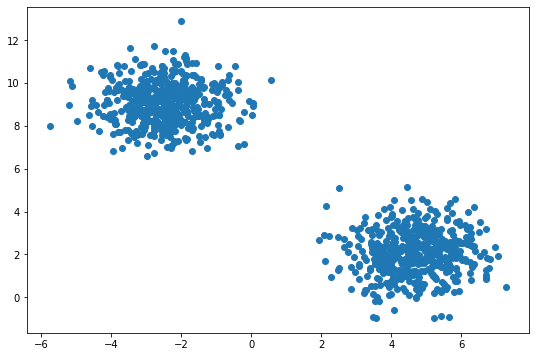

In [ ]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [ ]:
from scipy.spatial.distance import cdist

class KMeans:
    def __init__(self, k):
        self.k = k
        self.centroids = None

    def generate_random_centroids(self, data):
        idx = np.random.choice(data.shape[0], self.k, replace=False)
        return data[idx, :]

    def fit(self, x_train):
        self.centroids = self.generate_random_centroids(x_train)
        centroids_ids_for_points = self.predict(x_train)

        while True:
            new_centroids = np.empty(self.centroids.shape)

            for centroid_id in range(self.k):
                new_centroids[centroid_id] = x_train[centroids_ids_for_points == centroid_id].mean(axis=0)

            if np.array_equal(new_centroids, self.centroids):
                break

            self.centroids = new_centroids
            centroids_ids_for_points = self.predict(x_train)

    def predict(self, x_test):
        distances = cdist(x_test, self.centroids, 'euclidean')
        centroids_ids_for_points = np.array([np.argmin(i) for i in distances])
        return centroids_ids_for_points

In [ ]:
model = KMeans(k=2)
model.fit(X)

y = model.predict(X)

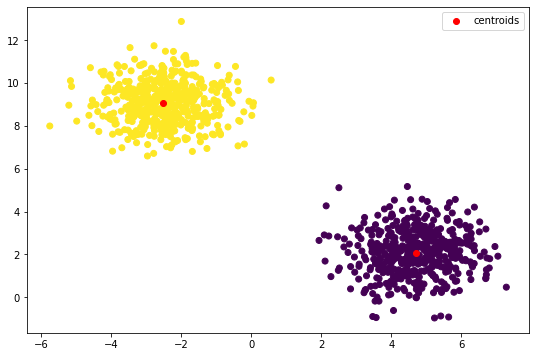

In [ ]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.centroids[:,0], model.centroids[:,1], c='red', label='centroids')
plt.legend();

Задание 2

In [ ]:
np.random.seed(42)
X, _ = make_blobs(n_samples=1000,
                  centers=10,
                  n_features=2,
                  cluster_std=np.random.uniform(low=0.5, high=2, size=(10)),
                  random_state=42)


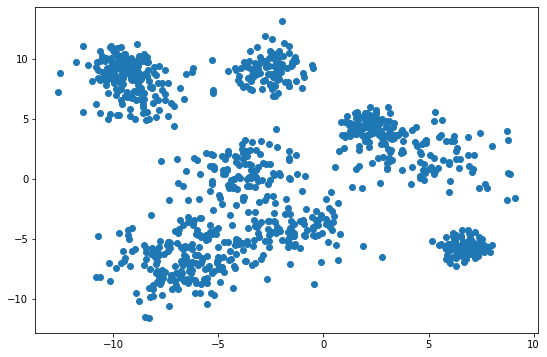

In [ ]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

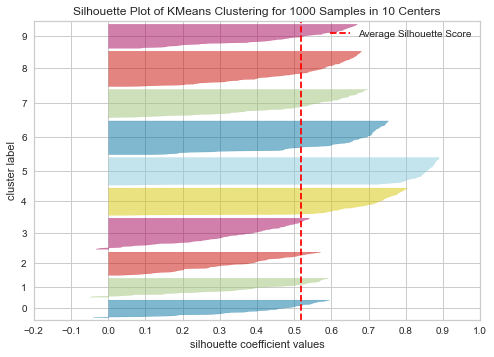

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

Задание 3

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
X, _ = make_moons(n_samples=100)

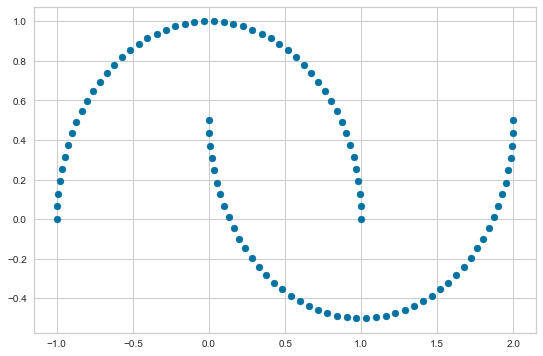

In [ ]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [ ]:
cluster_ids = DBSCAN().fit_predict(X)

In [ ]:
cluster_ids

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

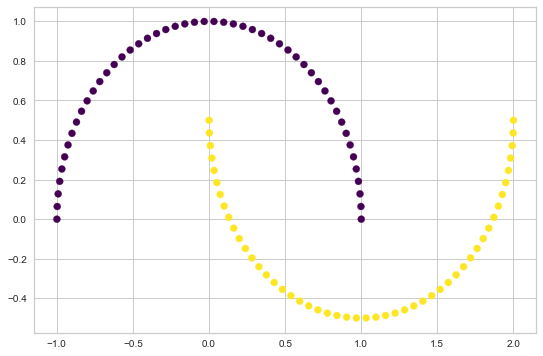

In [ ]:
plt.figure(figsize=(9,6), edgecolor="red")
scatter = plt.scatter(X[:,0], X[:,1], c=cluster_ids, cmap="viridis")

Задание 4

In [ ]:
np.random.seed(42)
X, _ = make_blobs(n_samples=1000,
                  centers=15,
                  n_features=2,
                  cluster_std=np.random.uniform(low=0.5, high=1.2, size=(15)),
                  random_state=42)


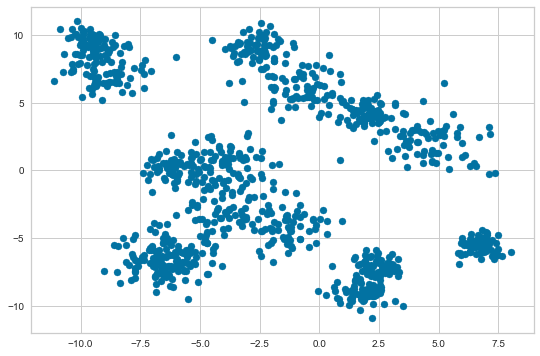

In [ ]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])


Text(0, 0.5, 'Distance')

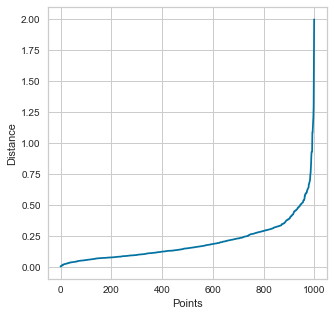

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=15)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:, 14], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.3565809330794673


<Figure size 360x360 with 0 Axes>

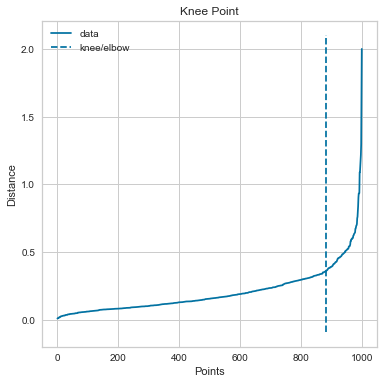

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])